# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [ ]:
# Our data management libraries
import pandas as pd
import numpy as np

# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns
# This command tells python to use seaborn for its styling.
sns.set()

# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline

# Provides z-score helper function
import scipy.stats as stats


# Ignore this, this is just for displaying images.
from IPython.display import Image



# Load the csv file into a pandas dataframe.


In [4]:
# Load the csv file into a pandas dataframe.

df = pd.read_csv('data/cars.csv')
df.shape


(11914, 15)

# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [5]:
# 1. Print the number of duplicate rows we have in our dataframe.
df.duplicated().sum()

720

In [6]:
#  2. Modify our df to have all duplicate rows removed. 
df = df.drop_duplicates()

In [7]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
print(df.duplicated().sum())
df.duplicated()

0


0        False
1        False
2        False
3        False
4        False
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Length: 11194, dtype: bool

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [9]:
# * Which column has the most null values and how many null values does it have?

df.isnull().sum()


Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [10]:
# * Print how long (aka how many rows) our dataframe is.

df.shape

(11194, 15)

In [11]:
# * Remove any row that has a null value in it. 

df = df.dropna()


In [13]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.

print(df.shape)

df.isnull().sum()

(11092, 15)


Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

### Make a bar chart that displays how many time each brand of car appears in this data. 
_Brand of car is the `Make` of the car._

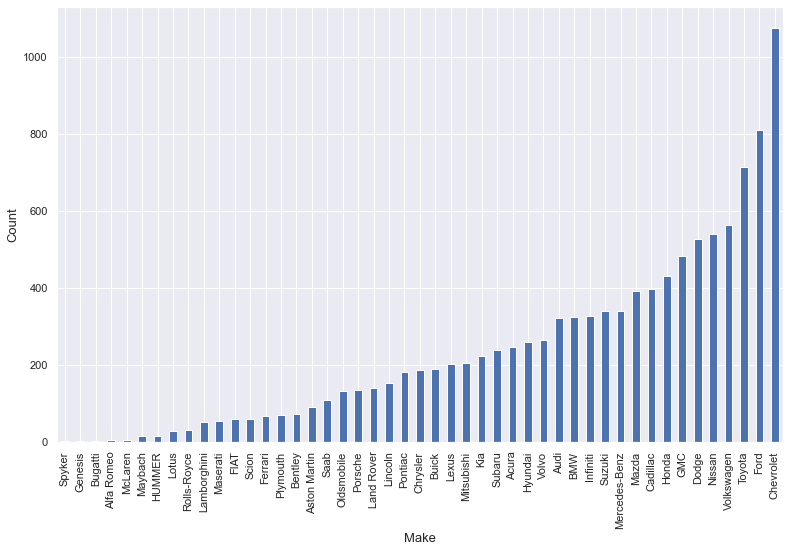

In [35]:
# Make a bar chart that displays how many times each brand of car appears in this data. 

plt.figure(figsize=[13,8])
n = df.groupby('Make')['Make'].count()
n = n.sort_values(ascending=True)
plt.xlabel('Make', fontsize=13)
plt.ylabel('Count', fontsize=13)
n.plot(kind='bar')


# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

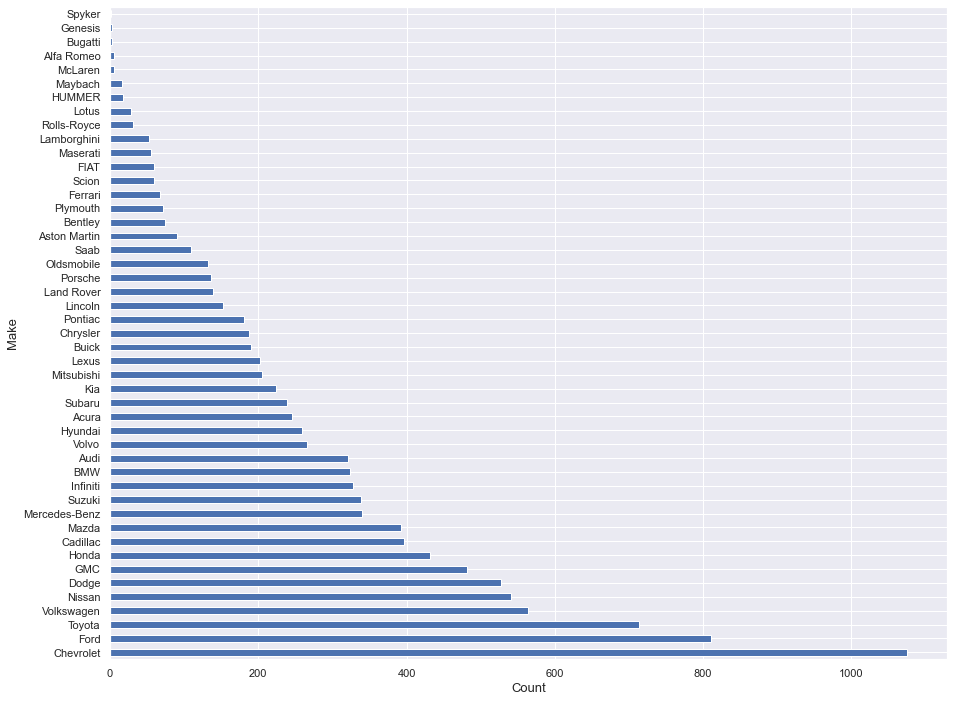

In [39]:
# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.
plt.figure(figsize=[15,12])
n = n.sort_values(ascending=False)
plt.xlabel('Count', fontsize=13)
plt.ylabel('Make', fontsize=13)
n.plot(kind='barh')

### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


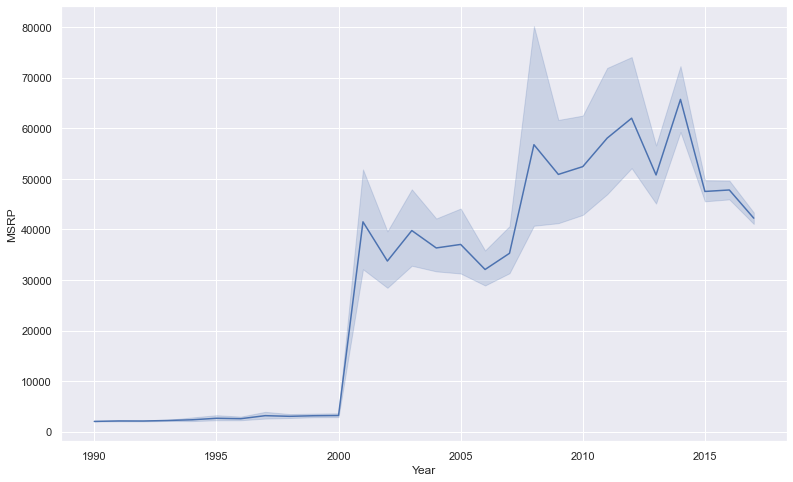

In [31]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
fig, ax = plt.subplots(figsize=(13,8))
sns.lineplot(x = 'Year', y='MSRP', ax=ax, data=df)


# It seems as though in the years before 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for 
every year before 2000 make it 10x the original MSRP.

In [33]:
# Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.
c1 = df['Year'] < 2000
df['adjusted_price'] = np.where(c1, df['MSRP']*10, df['MSRP'])
df.head()



,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

NameError: name 'plot' is not defined

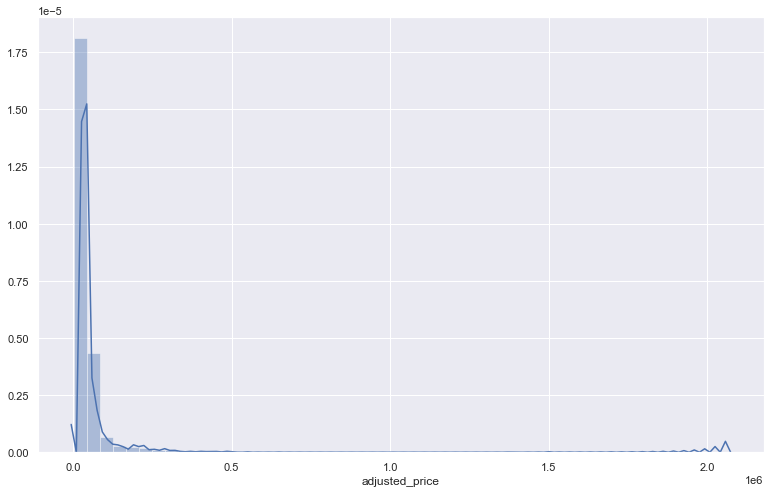

In [54]:
# Replot the new adjusted price and make the y-axis start at 0 and go up to 100,000

plt.figure(figsize=(13,8))
mplt = sns.distplot(df['adjusted_price'])
plot.xlabel('Year')
plot.ylabel('adjusted_price')
mplt.set(ylim=(0,100000))


# What are the top 5 car makers make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. 
* Use our `adjusted_price` column for this

In [47]:
# What are the top 5 car makers make the most expensive cars on average. 

car_makers = df.groupby('Make')['MSRP'].mean()
car_makers = car_makers.round(2)
car_makers = car_makers.sort_values(ascending=False)
car_makers[:5]




Make
Bugatti        1757223.67
Maybach         546221.88
Rolls-Royce     351130.65
Lamborghini     331567.31
Bentley         247169.32
Name: MSRP, dtype: float64

# What are the top 5 car makers that have the highest median highway MPG?

In [48]:
# Which car makers have the highest median highway MPG?
highest_median = df.groupby('Make')['highway MPG'].median()
highest_median = highest_median.sort_values(ascending=False)
highest_median[:5]



Make
Alfa Romeo    34
FIAT          33
Volkswagen    32
Scion         32
Honda         32
Name: highway MPG, dtype: int64

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']

In [51]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
plt.figure(figsize=(13,8))
maker = ['Chevrolet', 'Ford', 'Toyota']
mdf = df[df['Make'].isin(maker)]
sns.histplot(data=mdf, x='adjusted_price', y='Make')


AttributeError: module 'seaborn' has no attribute 'histplot'

<Figure size 936x576 with 0 Axes>

# Remake the same histogram, but limit the x-axis from 0 to 100,000

[(0.0, 100000.0)]

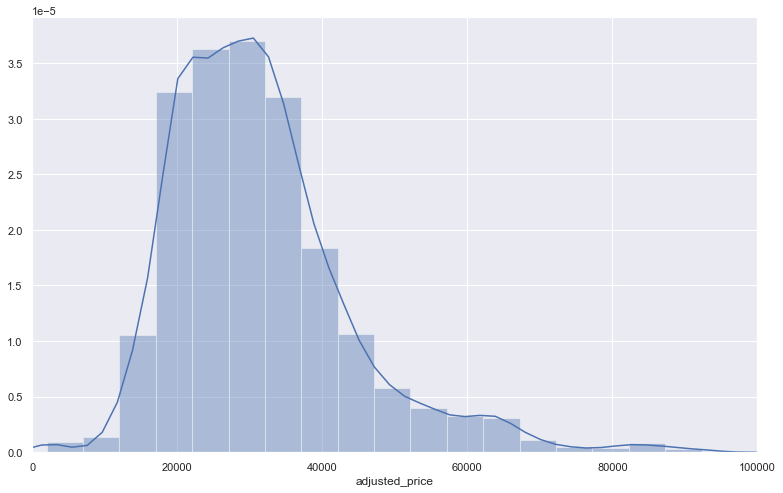

In [52]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000

plt.figure(figsize=(13,8))
maker = ['Chevrolet', 'Ford', 'Toyota']
mdf = df['Make'].isin(maker)
mplt = sns.distplot(df[mdf]['adjusted_price'])
mplt.set(xlim=(0,100000))


# Plot the relationship between Engine HP and highway MPG

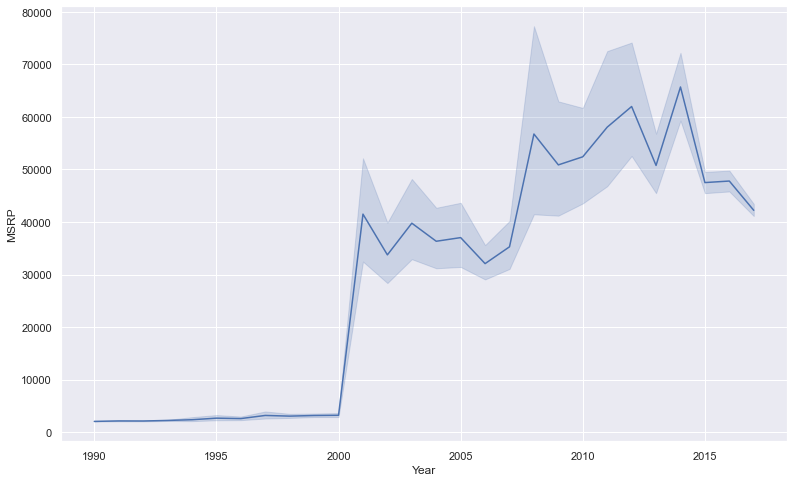

In [55]:
# Plot the relationship between Engine HP and highway MPG

fig, ax = plt.subplots(figsize=(13,8))
sns.lineplot(x = 'Year', y='MSRP', ax=ax, data=df)


# Remove any statisical outliers from Engine HP and highway MPG and plot the result.
* Statisical outliers meaning values that are further than 3 standard deviations from the mean 
* Create a new columns for z-scores for each 'Engine HP' and 'highway MPG' named 'Engine HP_zscore' and 'highway MPG_zscore'
* Calculate the z-scores for each of our target columns.
* Make sure you set the z-scores to be their absolute values. 
* Create condition masks for when either of those absolute values are greater than 3.

* Create a new dataframe that is a copy of our dataframe using df.copy()

* Using our new dataframe
    * Filter out all Engine HP Z-Scores that are greater than 3
    * Filter out all Highway MPG z-scores that are greater than 3.
    * Make the same scatterplot plotting the relationship of Engine HP and Highway MPG as before but with the this dataframe.

In [23]:
# Remove any statisical outliers from Engine HP and highway MPG




# What does this plot tell you about how Engine HP affects highway MPG?

In [26]:
# What does this plot tell you about how Engine HP affects highway MPG?
print('YOUR ANSWER HERE')

YOUR ANSWER HERE


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

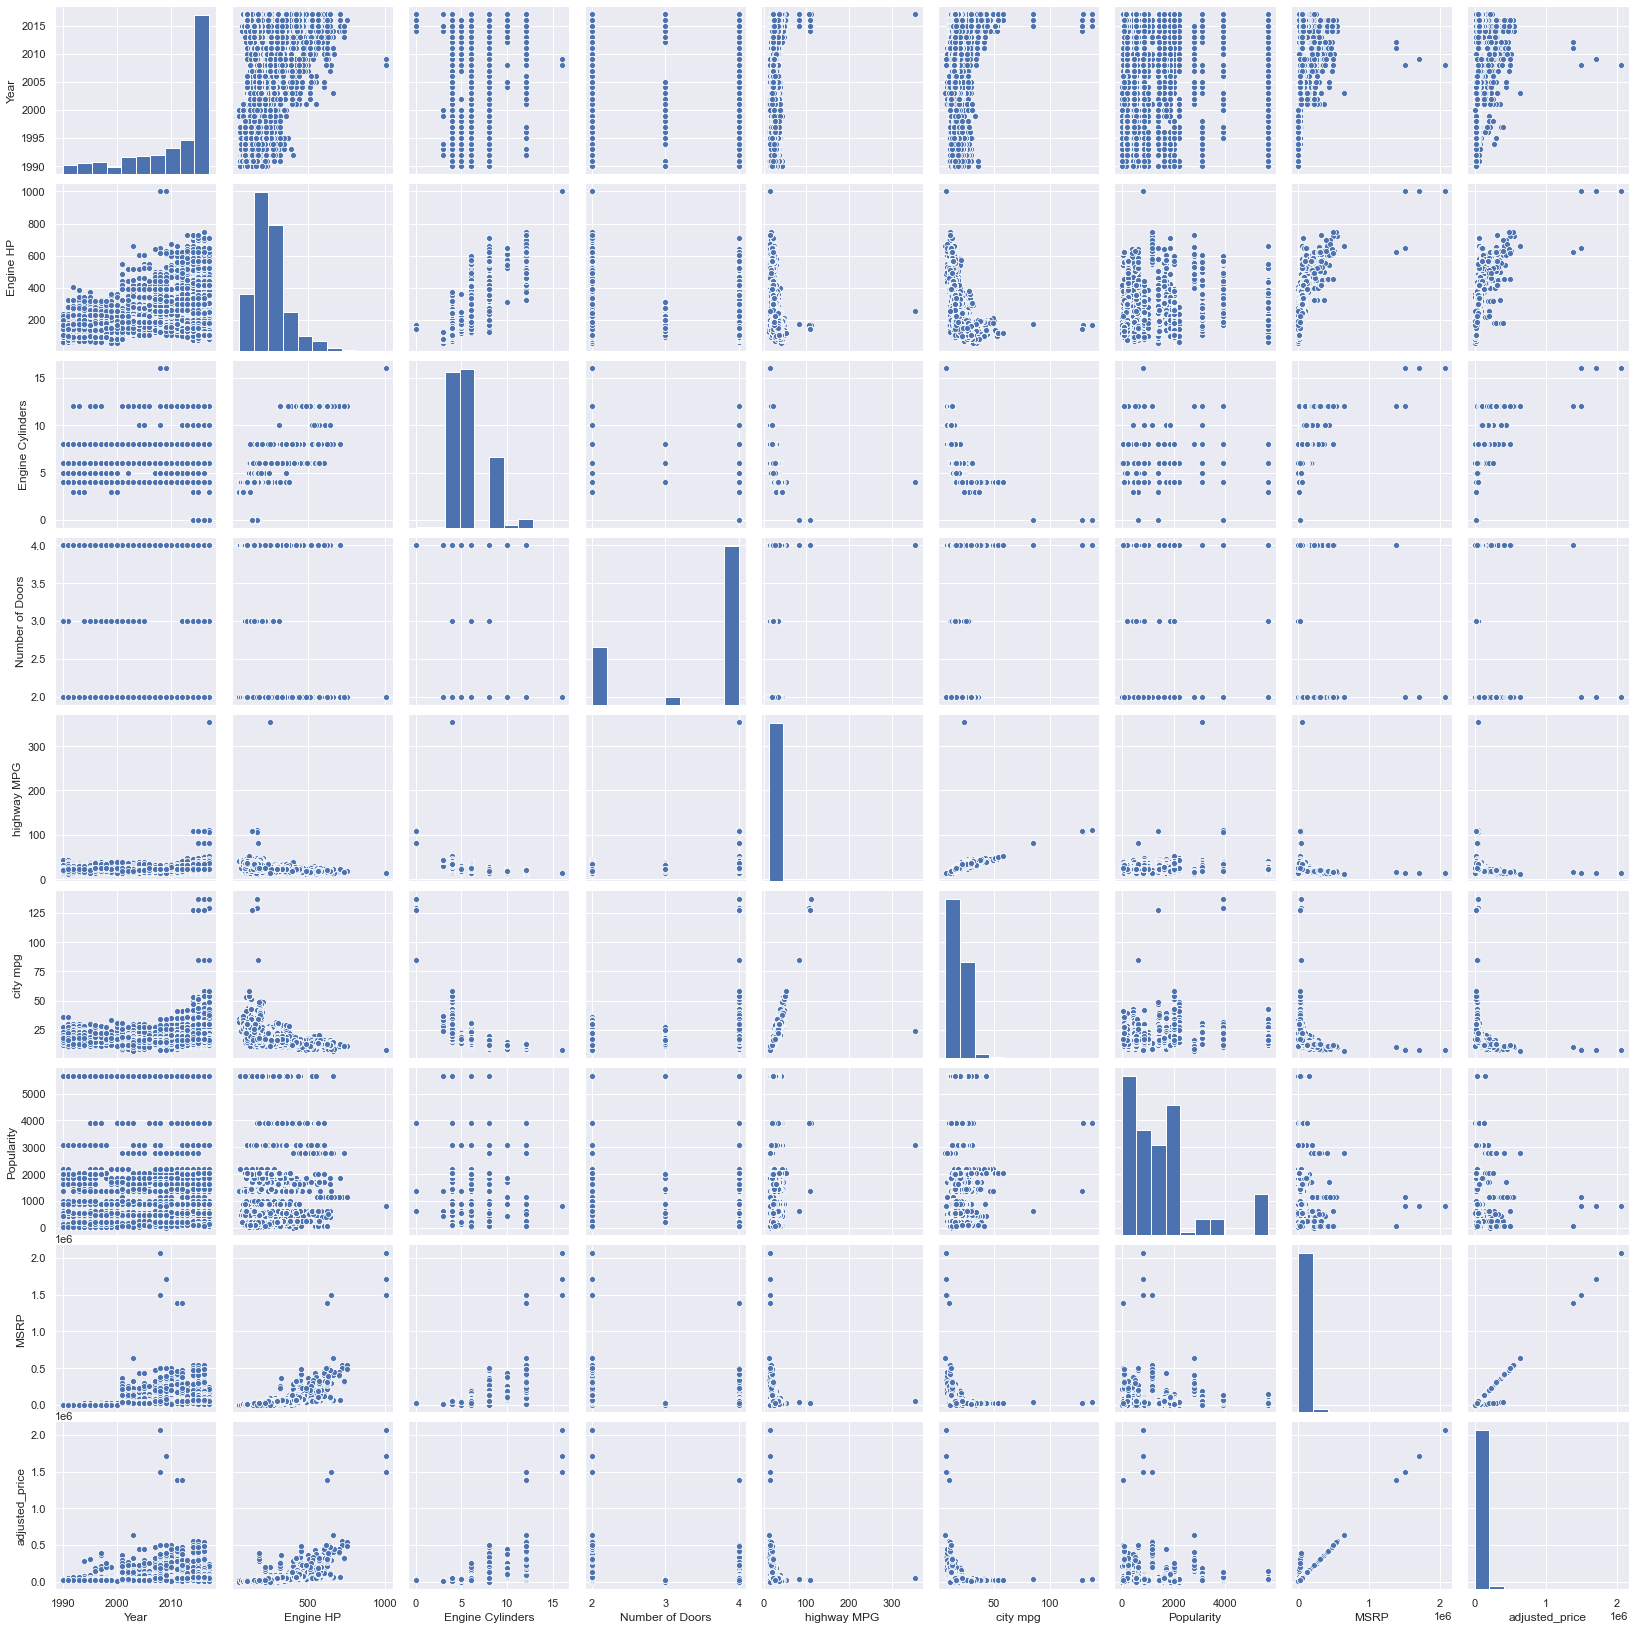

In [56]:
# Using a pairplot, display all of the linear relationship.

sns.pairplot(df)

In [57]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print('City MPG vs Highway MPG')



City MPG vs Highway MPG


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

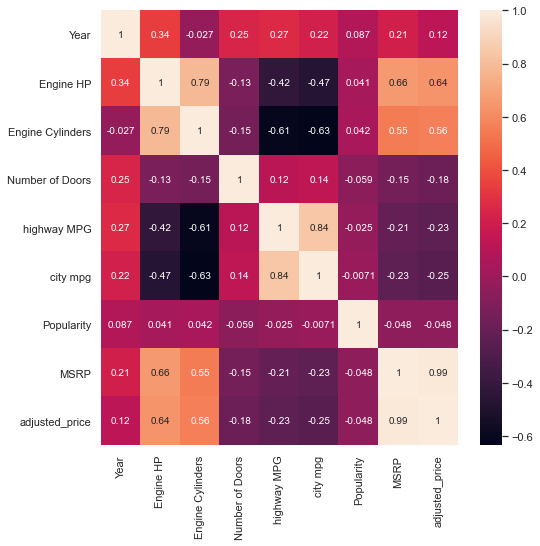

In [58]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(), ax=ax, annot=True)


# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well
* Using subplots, display the histogram of adjusted_price for 'Ford' and 'Toyota' appear on charts side by side. 
    * `f, axes = plt.subplots(1, 2, figsize=(13,5))`



In [30]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well


